In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
scalar = StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture  
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [69]:
df = pd.read_csv('mcdonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


# EDA

In [71]:
df.shape

(1453, 15)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [73]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [74]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [75]:
df.duplicated().sum()

22

In [76]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
404    Yes        Yes    No        No     No  Yes   Yes   Yes        No   
421    Yes        Yes    No       Yes    Yes  Yes    No   Yes       Yes   
441     No        Yes    No       Yes     No  Yes   Yes    No        No   
453    Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
598     No        Yes    No       Yes    Yes  Yes   Yes    No        No   
674    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
710    Yes        Yes    No       Yes     No  Yes   Yes   Yes        No   
725     No        Yes    No       Yes    Yes  Yes   Yes    No        No   
741    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
744    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
745    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
774    Yes        Yes    No       Yes     No  Yes   Yes   Yes        No   
799    Yes        Yes    

In [77]:
df2= df.drop_duplicates()


In [78]:
df2.to_csv('mcdonalds_cleaned.csv', index=False)


In [79]:
df2

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [80]:
df2.drop(columns=["Like","spicy","Gender","Age","VisitFrequency"],axis = 1,inplace=True)

In [81]:
df2.columns

Index(['yummy', 'convenient', 'fattening', 'greasy', 'fast', 'cheap', 'tasty',
       'expensive', 'healthy', 'disgusting'],
      dtype='object')

# Idendentifying and applying OneHotEncoding

In [82]:
categorical_columns = df2.select_dtypes(include=['object']).columns


In [83]:
new_df2 = pd.get_dummies(df, columns=categorical_columns)


In [84]:
print(new_df2.head())


  spicy Like  Age      VisitFrequency  Gender  yummy_No  yummy_Yes  \
0    No   -3   61  Every three months  Female         1          0   
1    No   +2   51  Every three months  Female         0          1   
2   Yes   +1   62  Every three months  Female         1          0   
3    No   +4   69         Once a week  Female         0          1   
4    No   +2   49        Once a month    Male         1          0   

   convenient_No  convenient_Yes  fattening_No  ...  cheap_No  cheap_Yes  \
0              0               1             0  ...         0          1   
1              0               1             0  ...         0          1   
2              0               1             0  ...         1          0   
3              0               1             0  ...         0          1   
4              0               1             0  ...         0          1   

   tasty_No  tasty_Yes  expensive_No  expensive_Yes  healthy_No  healthy_Yes  \
0         1          0             0      

In [85]:
new_df2.shape

(1453, 25)

In [86]:
#creating a correlation matrix
correlation_matrix = new_df2.corr()

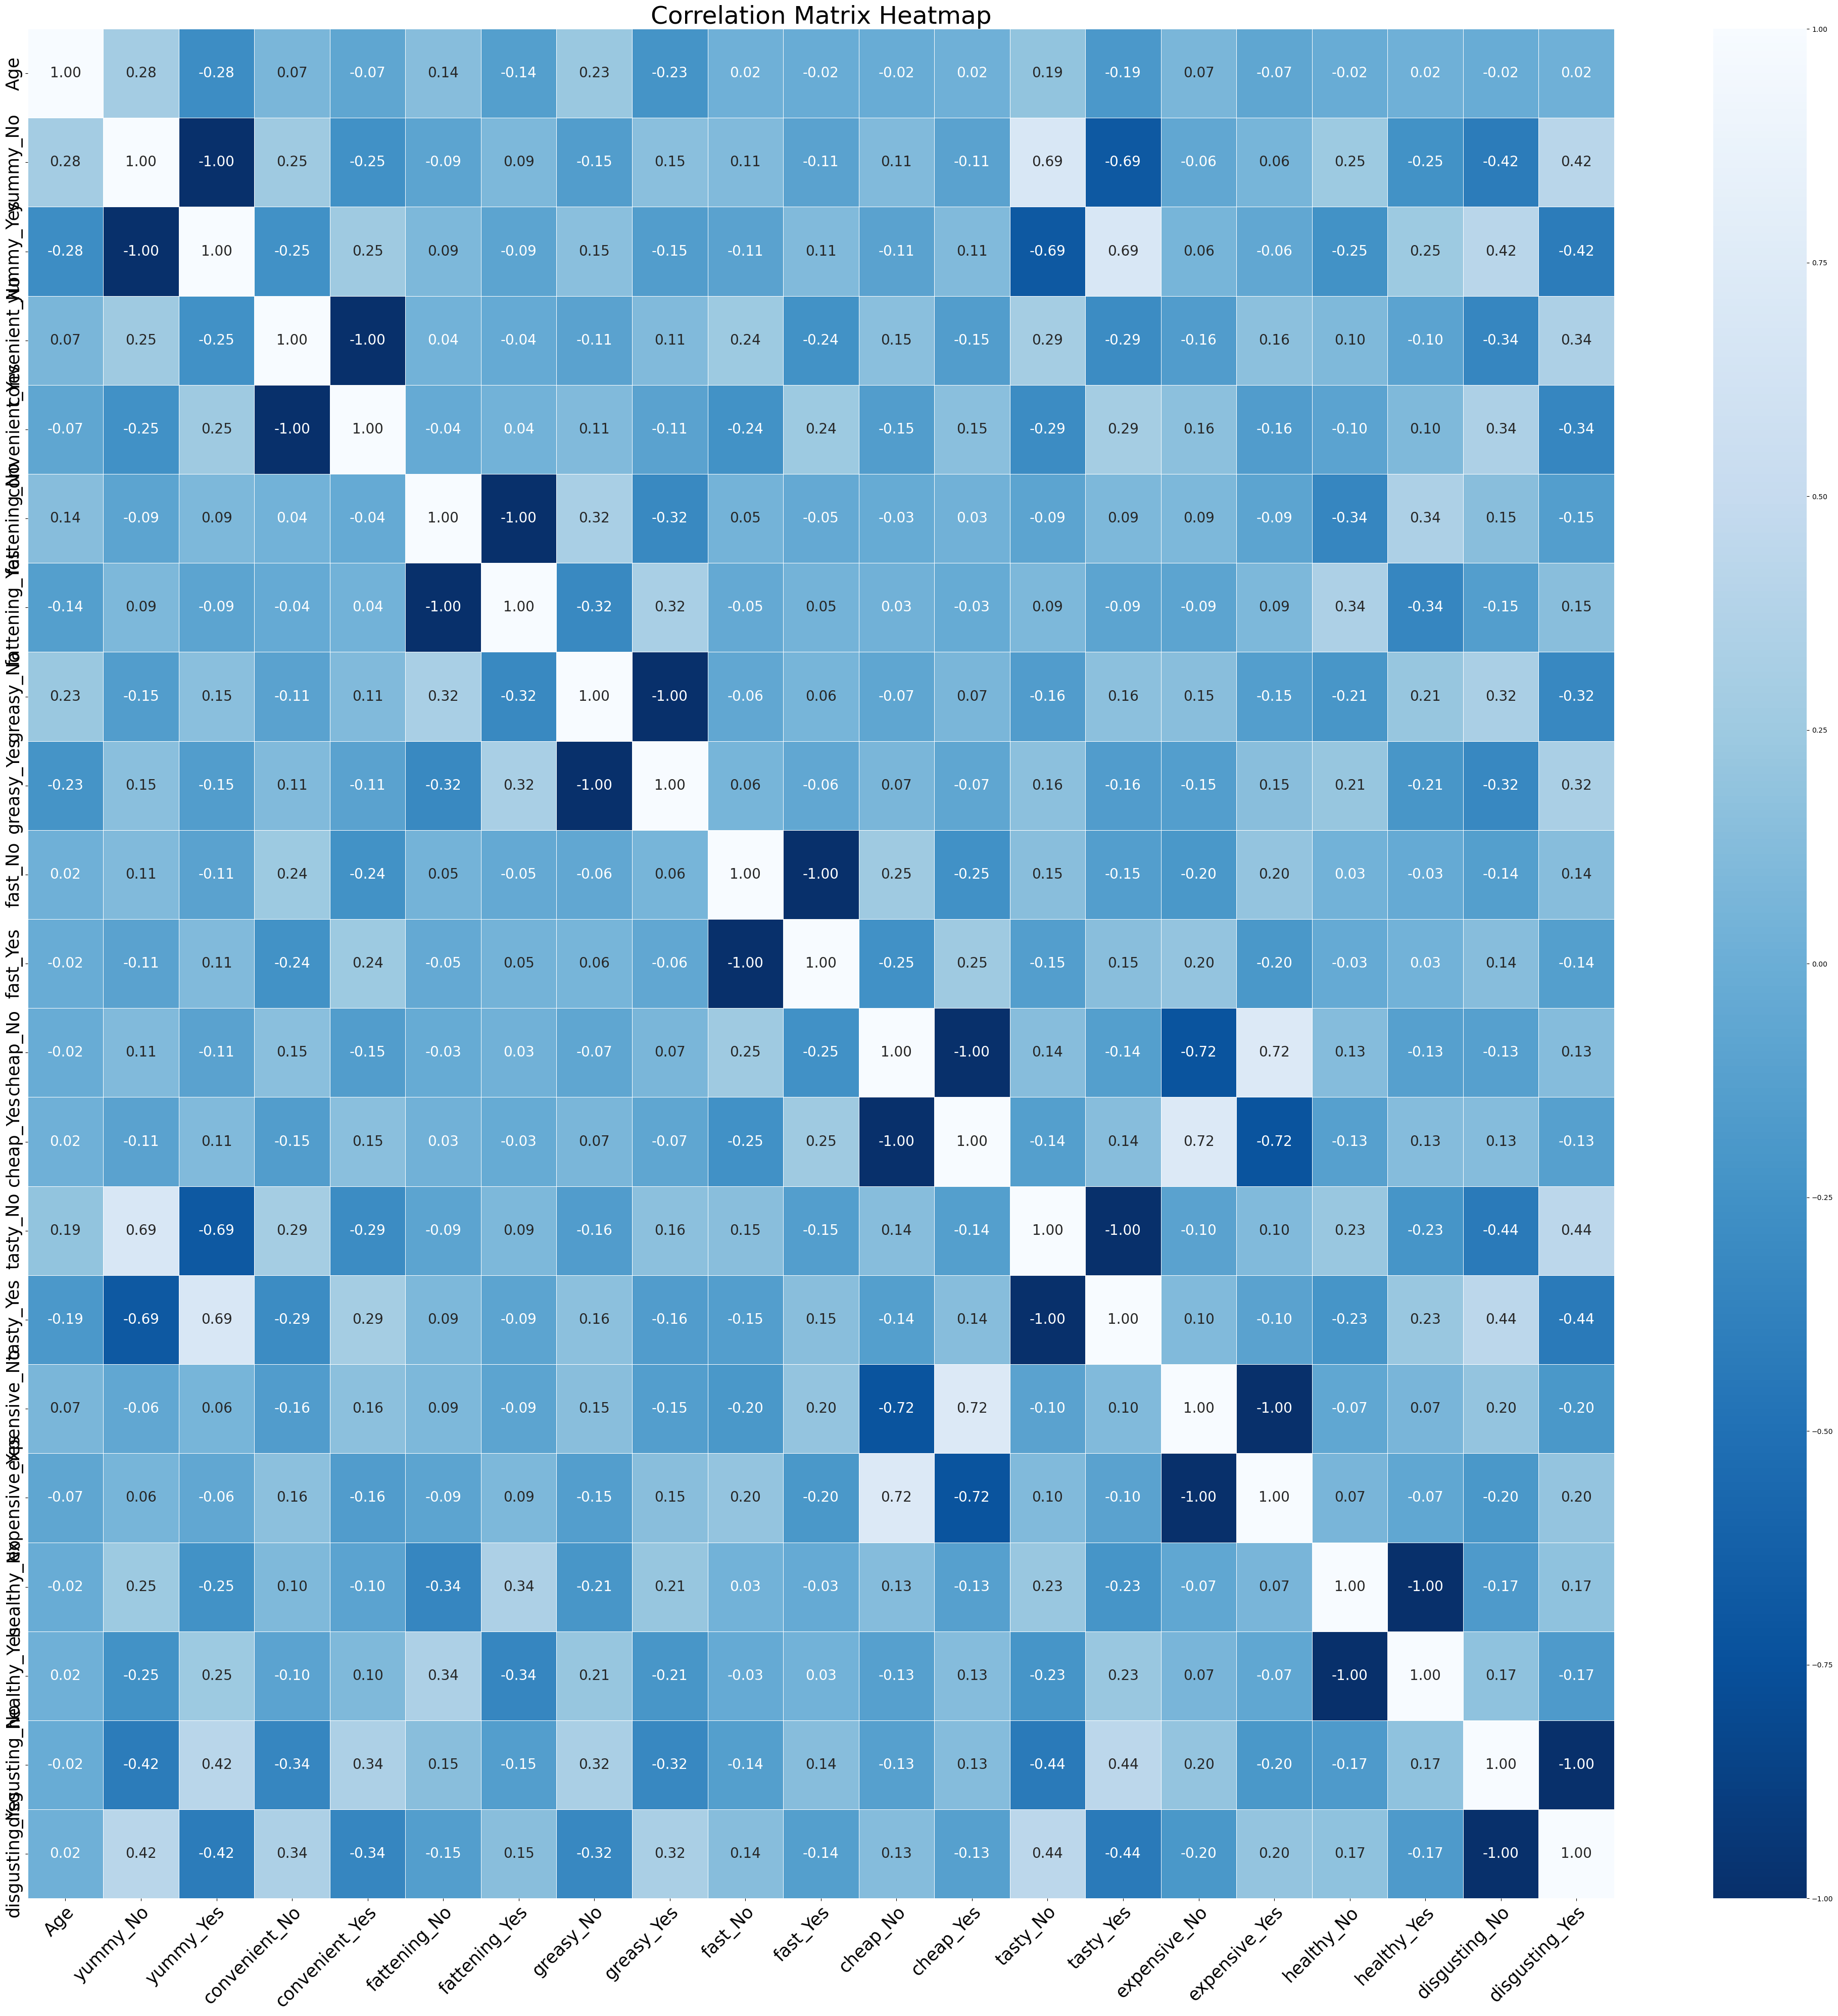

In [91]:
plt.figure(figsize=(40, 40))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues_r', linewidths=0.5, annot_kws={"size": 20}) 
plt.title('Correlation Matrix Heatmap', fontsize=35) 
plt.xticks(rotation=45, ha='right', fontsize=25, rotation_mode='anchor')  
plt.yticks(fontsize=25) 
plt.tight_layout()  
plt.show()


In [93]:
numerical_columns = new_df2.select_dtypes(exclude=['object']).columns
data_to_scale = new_df2[numerical_columns]


In [94]:
scaler = StandardScaler()


In [95]:
scaled_data = scaler.fit_transform(data_to_scale)


In [96]:
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)
print(scaled_df.head())


        Age  yummy_No  yummy_Yes  convenient_No  convenient_Yes  fattening_No  \
0  1.153258  1.111479  -1.111479      -0.318735        0.318735     -0.391375   
1  0.449839 -0.899702   0.899702      -0.318735        0.318735     -0.391375   
2  1.223600  1.111479  -1.111479      -0.318735        0.318735     -0.391375   
3  1.715993 -0.899702   0.899702      -0.318735        0.318735     -0.391375   
4  0.309156  1.111479  -1.111479      -0.318735        0.318735     -0.391375   

   fattening_Yes  greasy_No  greasy_Yes   fast_No  ...  cheap_No  cheap_Yes  \
0       0.391375   1.054476   -1.054476 -0.332951  ... -0.818605   0.818605   
1       0.391375  -0.948339    0.948339 -0.332951  ... -0.818605   0.818605   
2       0.391375  -0.948339    0.948339 -0.332951  ...  1.221590  -1.221590   
3       0.391375  -0.948339    0.948339 -0.332951  ... -0.818605   0.818605   
4       0.391375  -0.948339    0.948339 -0.332951  ... -0.818605   0.818605   

   tasty_No  tasty_Yes  expensive_No  

# PCA

In [97]:

pca = PCA(0.95)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components)
pca_df

,0,1,2,3,4,5,6,7,8,9
0,1.035512,-0.746978,0.797612,-2.637324,0.233129,-0.182058,-0.919839,0.490775,-0.106444,0.438152
1,-0.672360,0.705135,-2.039860,0.280017,-0.162934,0.295192,0.397569,0.386688,1.088118,0.686504
2,0.415982,2.017308,-0.022699,-0.465067,-2.415279,-1.389993,-1.157819,1.913265,1.984893,-1.303836
3,-0.125665,-1.596367,-1.259408,1.351998,-0.482814,0.320697,0.153140,-2.100043,2.284227,1.136106
4,-0.036737,-2.063776,0.909551,0.407441,-1.820719,-2.155730,-1.082309,2.324704,-0.226883,0.142658
...,...,...,...,...,...,...,...,...,...,...
1448,4.940052,1.528387,0.295897,0.757859,1.163609,-3.021146,0.047630,-1.339380,0.133937,0.185127
1449,-2.245618,1.226811,1.514671,2.660375,2.322370,-2.729128,-2.373043,-0.372034,-0.640550,-0.272900
1450,-0.588336,2.647805,-0.892446,-1.834887,0.415809,1.016988,-0.607466,-0.479957,0.420482,0.361484
1451,-3.964207,0.552905,3.109903,0.982221,-1.353034,-0.149606,0.902510,-0.276716,-0.487217,-0.037918


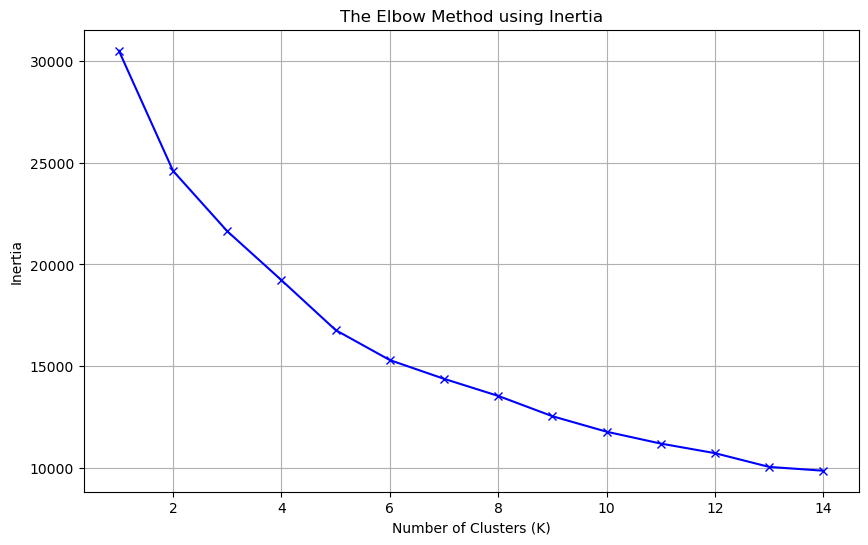

In [98]:
# Elbow method to find the optimal number of clusters
inertia = []
range_val = range(1, 15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))  # Fit the model
    inertia.append(kmean.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid(True)
plt.show()


In [99]:
# Building KMeans model with the chosen number of clusters
kmeans_model = KMeans(4)
kmeans_model.fit_predict(scaled_df)
clusters = kmeans_model.predict(scaled_df)

# Adding the cluster labels to the PCA DataFrame
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': clusters})], axis=1)

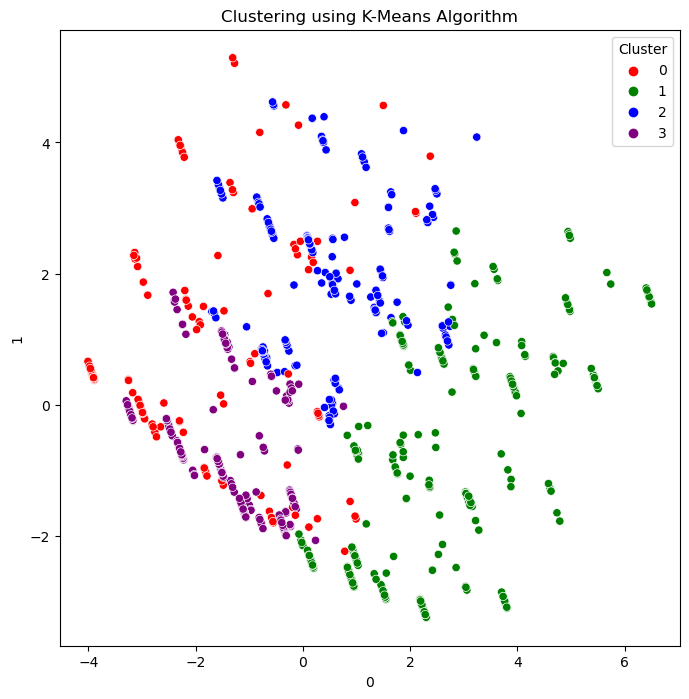

In [100]:
# Visualizing the clustered dataframe
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x=pca_df_kmeans.columns[0], y=pca_df_kmeans.columns[1], hue="cluster", data=pca_df_kmeans, palette=['red', 'green', 'blue', 'purple'])
plt.title("Clustering using K-Means Algorithm")
plt.legend(title='Cluster')
plt.show()


In [101]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=scaled_df.columns)
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=numerical_columns)

# Display the cluster centers
print(cluster_centers)


         Age  yummy_No  yummy_Yes  convenient_No  convenient_Yes  \
0  50.097701  0.281609   0.718391       0.068966        0.931034   
1  48.656522  0.993478   0.006522       0.232609        0.767391   
2  39.507837  0.188088   0.811912       0.028213        0.971787   
3  42.218000  0.168000   0.832000       0.012000        0.988000   

   fattening_No  fattening_Yes  greasy_No  greasy_Yes   fast_No  ...  \
0  1.000000e+00  -3.330669e-16   0.925287    0.074713  0.074713  ...   
1  3.260870e-02   9.673913e-01   0.300000    0.700000  0.160870  ...   
2  1.253918e-02   9.874608e-01   0.338558    0.661442  0.128527  ...   
3 -3.053113e-16   1.000000e+00   0.562000    0.438000  0.034000  ...   

   cheap_No  cheap_Yes  tasty_No  tasty_Yes  expensive_No  expensive_Yes  \
0  0.304598   0.695402  0.189655   0.810345      0.793103       0.206897   
1  0.473913   0.526087  0.947826   0.052174      0.580435       0.419565   
2  0.890282   0.109718  0.081505   0.918495      0.103448       0.8965

In [102]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df= pd.concat([scaled_df,pd.DataFrame({'Cluster' : kmeans_model.labels_})],axis =1)
cluster_df

,Age,yummy_No,yummy_Yes,convenient_No,convenient_Yes,fattening_No,fattening_Yes,greasy_No,greasy_Yes,fast_No,...,cheap_Yes,tasty_No,tasty_Yes,expensive_No,expensive_Yes,healthy_No,healthy_Yes,disgusting_No,disgusting_Yes,Cluster
0,1.153258,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,0.818605,1.345528,-1.345528,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,1
1,0.449839,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,2
2,1.223600,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-1.221590,-0.743203,0.743203,-1.339489,1.339489,-2.006908,2.006908,0.566488,-0.566488,2
3,1.715993,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,-1.765261,1.765261,3
4,0.309156,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,1.345528,-1.345528,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0.168472,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,3.003446,...,-1.221590,1.345528,-1.345528,-1.339489,1.339489,0.498279,-0.498279,-1.765261,1.765261,1
1449,-0.605289,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,3.003446,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,3
1450,0.520181,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,2
1451,-0.253579,-0.899702,0.899702,-0.318735,0.318735,2.555092,-2.555092,1.054476,-1.054476,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,0


In [103]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,Age,yummy_No,yummy_Yes,convenient_No,convenient_Yes,fattening_No,fattening_Yes,greasy_No,greasy_Yes,fast_No,...,cheap_Yes,tasty_No,tasty_Yes,expensive_No,expensive_Yes,healthy_No,healthy_Yes,disgusting_No,disgusting_Yes,Cluster
17,-0.956998,-0.899702,0.899702,-0.318735,0.318735,2.555092,-2.555092,-0.948339,0.948339,-0.332951,...,-1.221590,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,0
28,0.731207,1.111479,-1.111479,-0.318735,0.318735,2.555092,-2.555092,1.054476,-1.054476,-0.332951,...,-1.221590,1.345528,-1.345528,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,0
31,-0.323921,1.111479,-1.111479,-0.318735,0.318735,2.555092,-2.555092,1.054476,-1.054476,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,0
46,0.660865,1.111479,-1.111479,-0.318735,0.318735,2.555092,-2.555092,1.054476,-1.054476,-0.332951,...,-1.221590,-0.743203,0.743203,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,0
54,0.660865,-0.899702,0.899702,-0.318735,0.318735,2.555092,-2.555092,1.054476,-1.054476,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,1.223600,1.111479,-1.111479,-0.318735,0.318735,2.555092,-2.555092,1.054476,-1.054476,-0.332951,...,-1.221590,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,0
1426,-0.816314,-0.899702,0.899702,3.137401,-3.137401,2.555092,-2.555092,1.054476,-1.054476,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,0
1440,0.731207,-0.899702,0.899702,-0.318735,0.318735,2.555092,-2.555092,1.054476,-1.054476,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,0
1442,-0.956998,-0.899702,0.899702,-0.318735,0.318735,2.555092,-2.555092,-0.948339,0.948339,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,0


In [104]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,Age,yummy_No,yummy_Yes,convenient_No,convenient_Yes,fattening_No,fattening_Yes,greasy_No,greasy_Yes,fast_No,...,cheap_Yes,tasty_No,tasty_Yes,expensive_No,expensive_Yes,healthy_No,healthy_Yes,disgusting_No,disgusting_Yes,Cluster
0,1.153258,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,0.818605,1.345528,-1.345528,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,1
4,0.309156,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,1.345528,-1.345528,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,1
8,0.942233,1.111479,-1.111479,3.137401,-3.137401,-0.391375,0.391375,-0.948339,0.948339,3.003446,...,-1.221590,1.345528,-1.345528,-1.339489,1.339489,0.498279,-0.498279,-1.765261,1.765261,1
10,0.590523,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,0.818605,1.345528,-1.345528,0.746553,-0.746553,0.498279,-0.498279,-1.765261,1.765261,1
12,1.434626,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,0.818605,1.345528,-1.345528,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-1.379049,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,1.345528,-1.345528,0.746553,-0.746553,0.498279,-0.498279,-1.765261,1.765261,1
1444,0.731207,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,1.345528,-1.345528,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,1
1445,-1.871442,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,-1.765261,1.765261,1
1448,0.168472,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,3.003446,...,-1.221590,1.345528,-1.345528,-1.339489,1.339489,0.498279,-0.498279,-1.765261,1.765261,1


In [105]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,Age,yummy_No,yummy_Yes,convenient_No,convenient_Yes,fattening_No,fattening_Yes,greasy_No,greasy_Yes,fast_No,...,cheap_Yes,tasty_No,tasty_Yes,expensive_No,expensive_Yes,healthy_No,healthy_Yes,disgusting_No,disgusting_Yes,Cluster
1,0.449839,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,2
2,1.223600,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-1.221590,-0.743203,0.743203,-1.339489,1.339489,-2.006908,2.006908,0.566488,-0.566488,2
6,0.801549,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,-1.221590,-0.743203,0.743203,-1.339489,1.339489,-2.006908,2.006908,0.566488,-0.566488,2
9,-0.886656,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,2
11,-1.168024,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,-1.765261,1.765261,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,-1.449391,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,2
1438,-1.238366,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,2
1441,-1.097682,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,2
1447,-0.112896,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,3.003446,...,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,2


In [106]:
cluster_4_df = cluster_df[cluster_df["Cluster"]==3]
cluster_4_df

,Age,yummy_No,yummy_Yes,convenient_No,convenient_Yes,fattening_No,fattening_Yes,greasy_No,greasy_Yes,fast_No,...,cheap_Yes,tasty_No,tasty_Yes,expensive_No,expensive_Yes,healthy_No,healthy_Yes,disgusting_No,disgusting_Yes,Cluster
3,1.715993,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,-1.765261,1.765261,3
5,0.731207,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,3
7,-1.519733,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,3
15,0.449839,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,3
16,-0.745972,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,1.153258,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,3
1439,1.153258,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,3.003446,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,-2.006908,2.006908,-1.765261,1.765261,3
1443,0.379498,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488,3
1446,0.520181,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,0.818605,-0.743203,0.743203,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,3


<Axes: xlabel='Cluster', ylabel='count'>

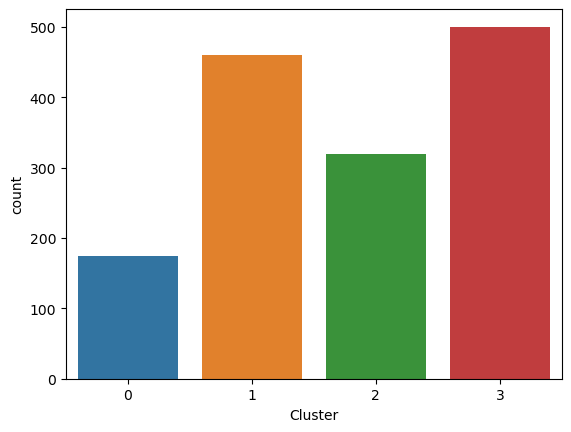

In [107]:
#Visualization
sns.countplot(x='Cluster', data = cluster_df)

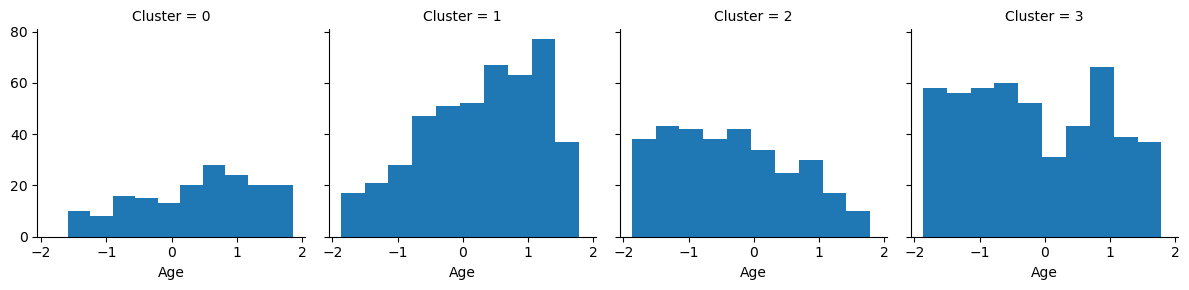

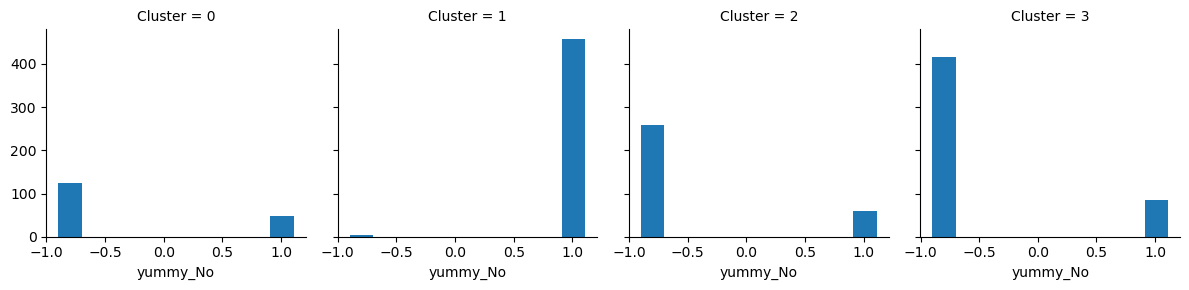

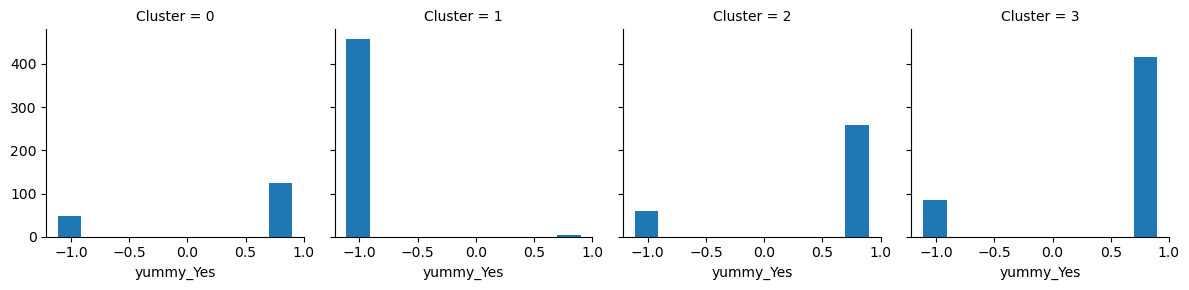

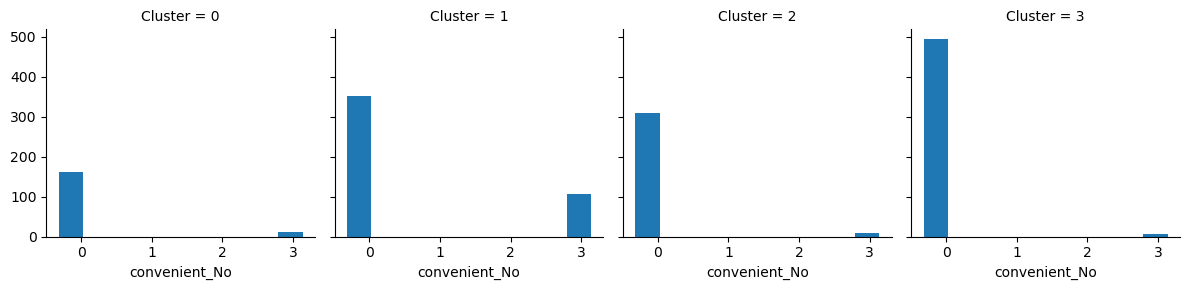

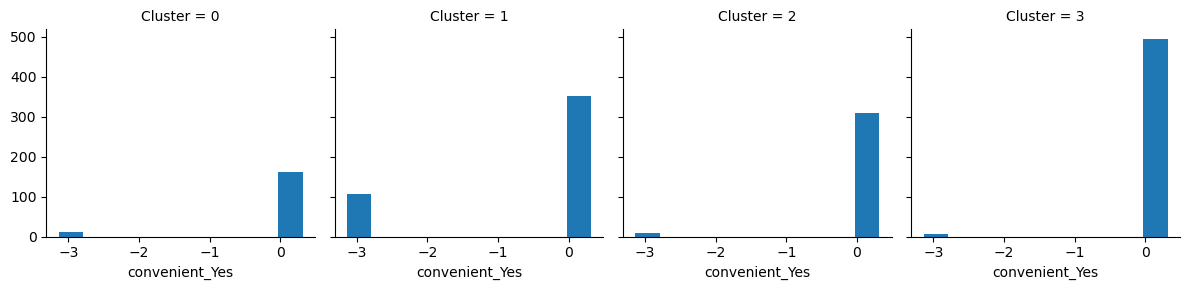

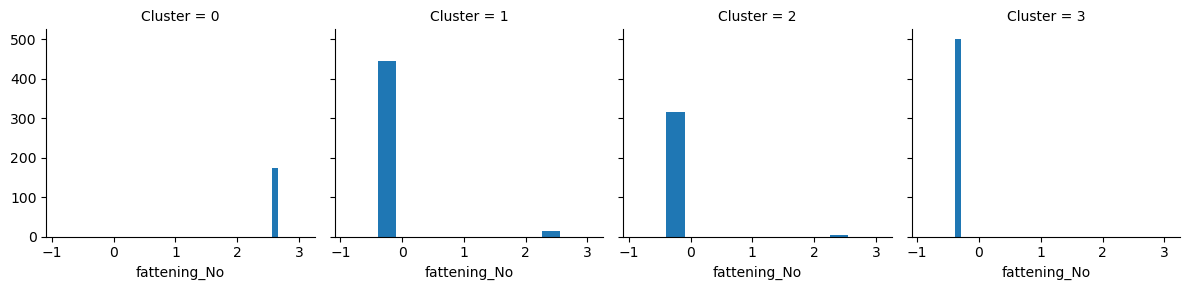

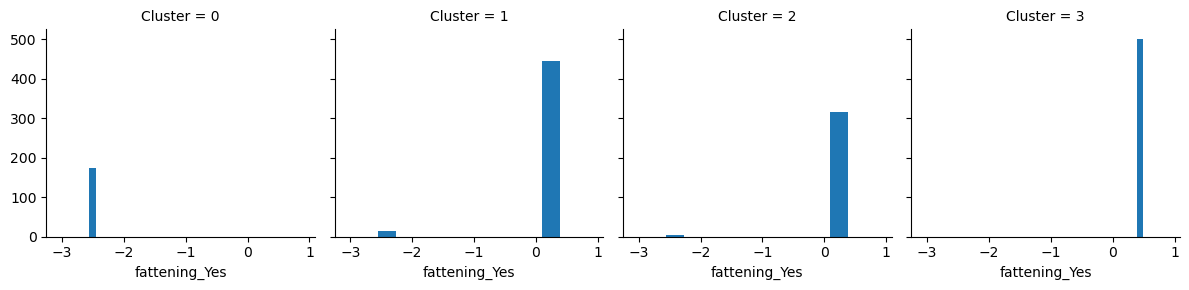

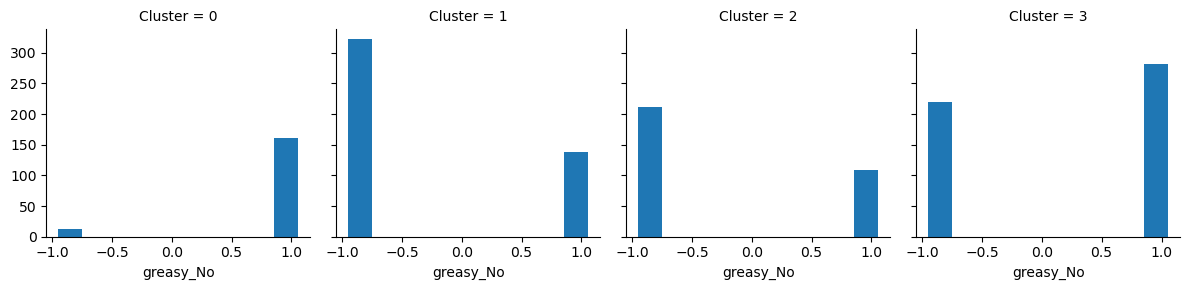

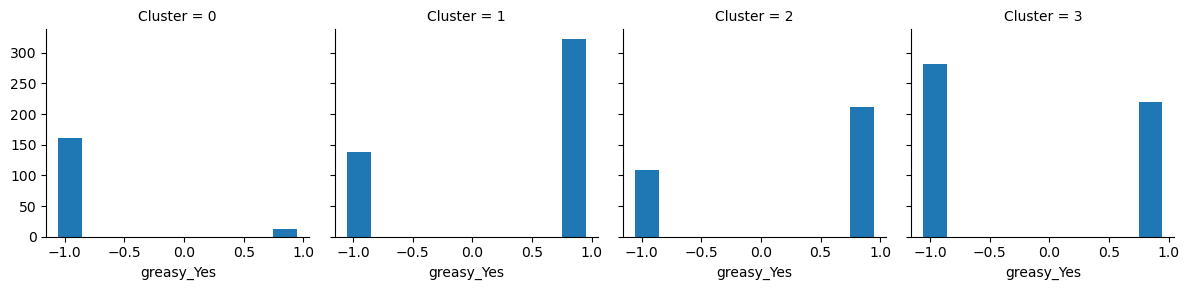

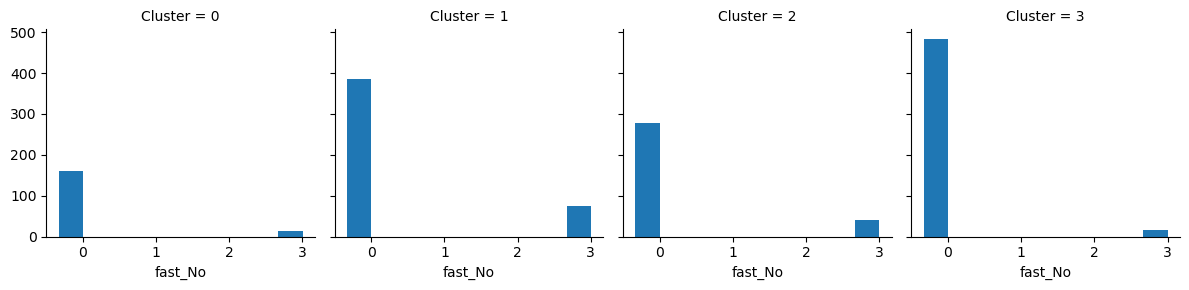

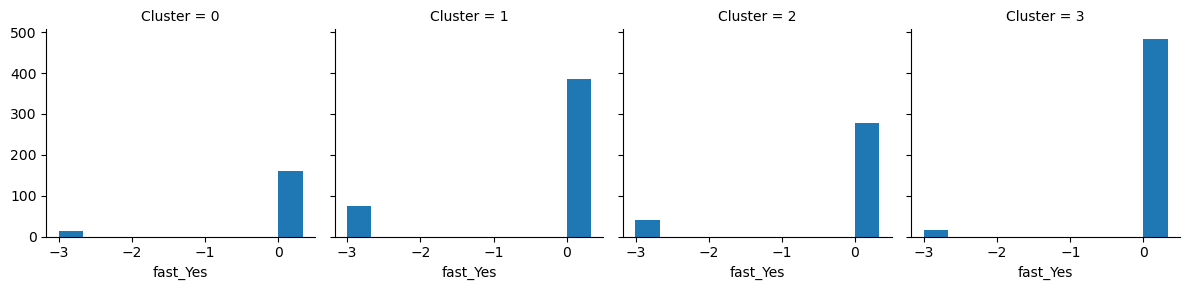

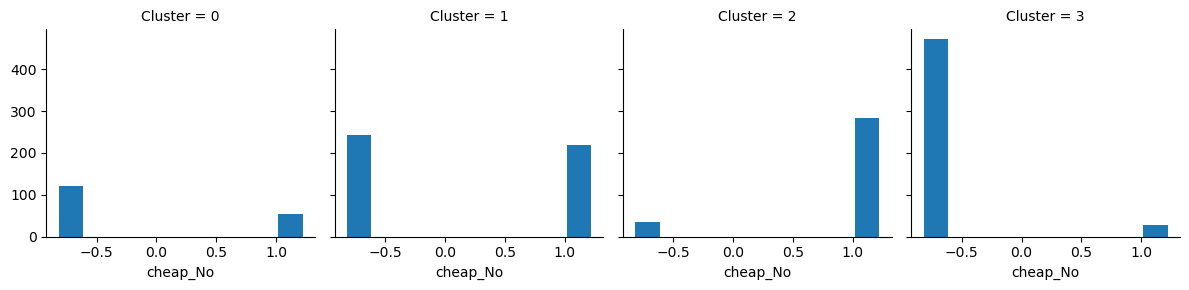

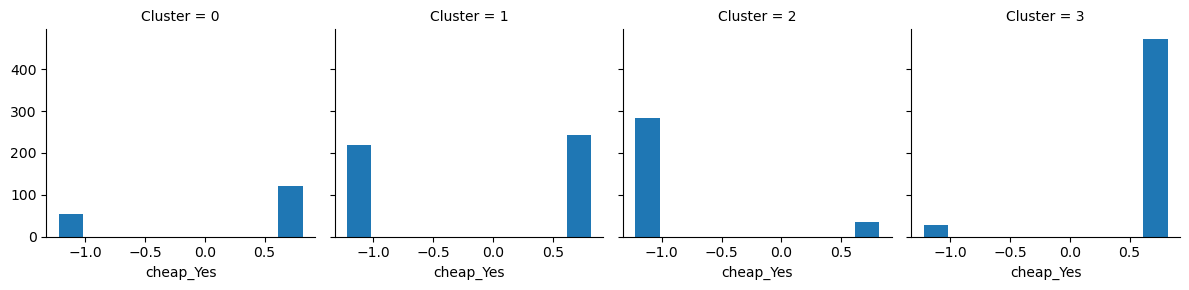

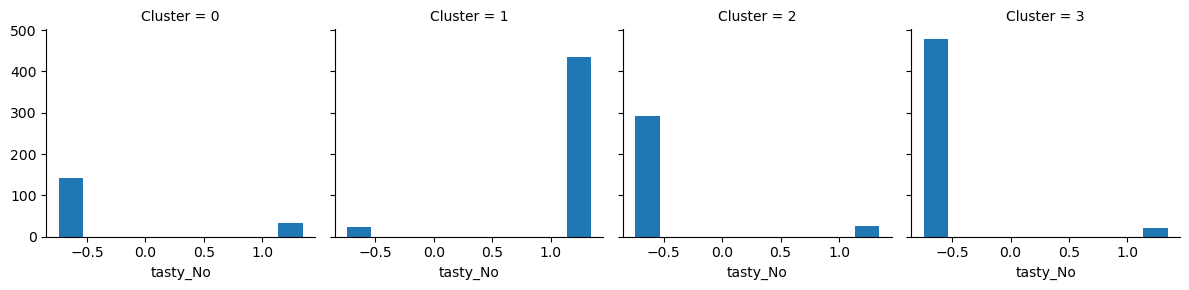

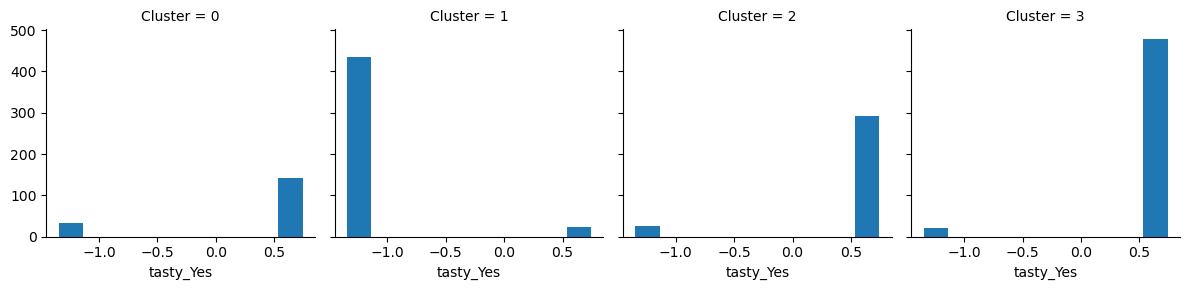

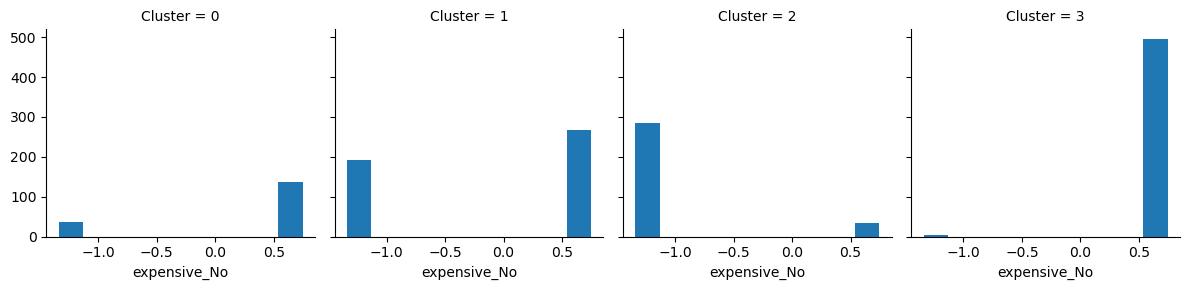

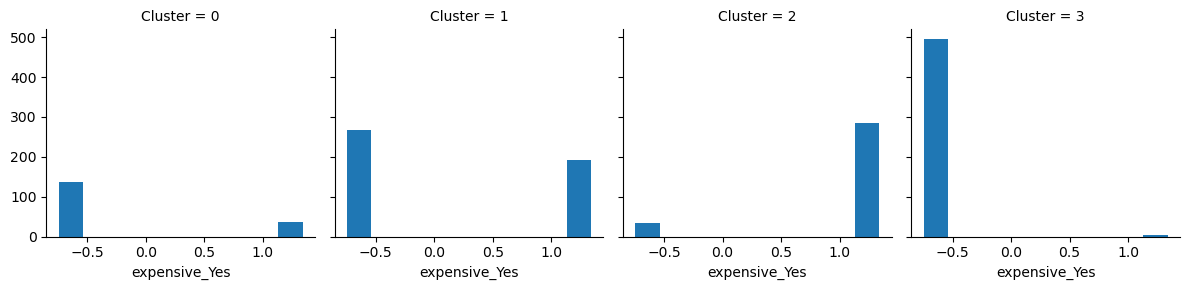

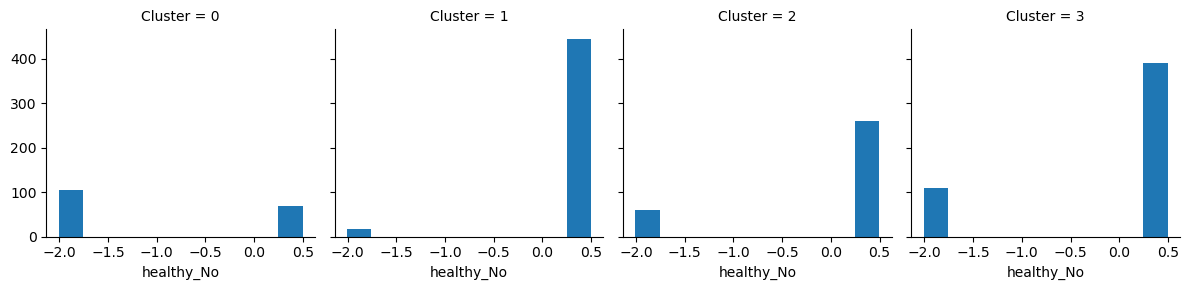

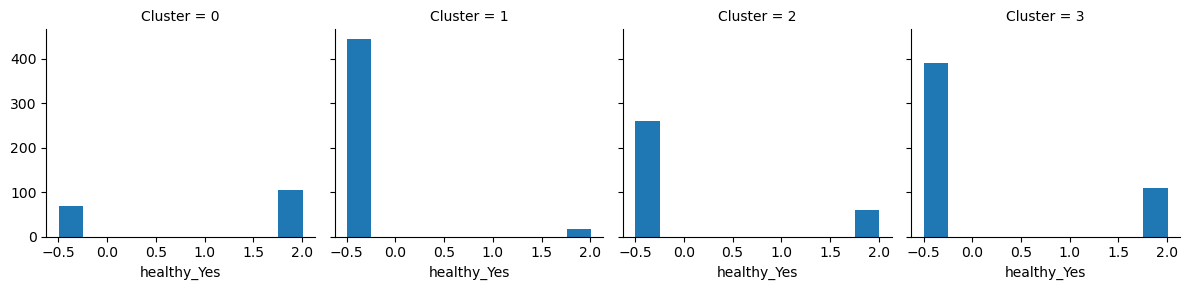

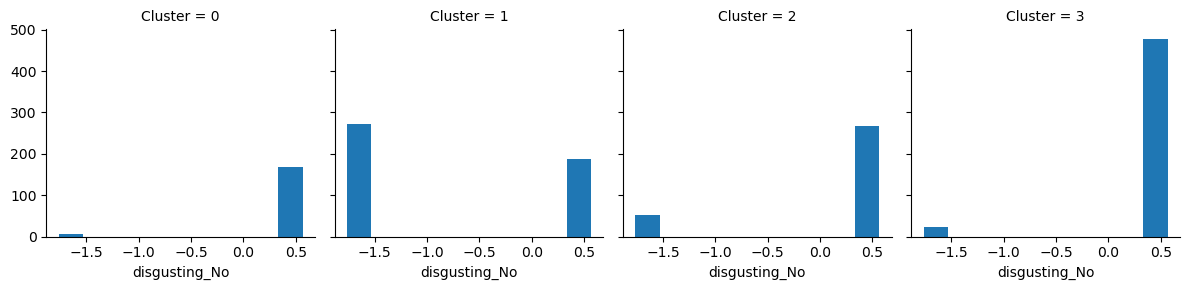

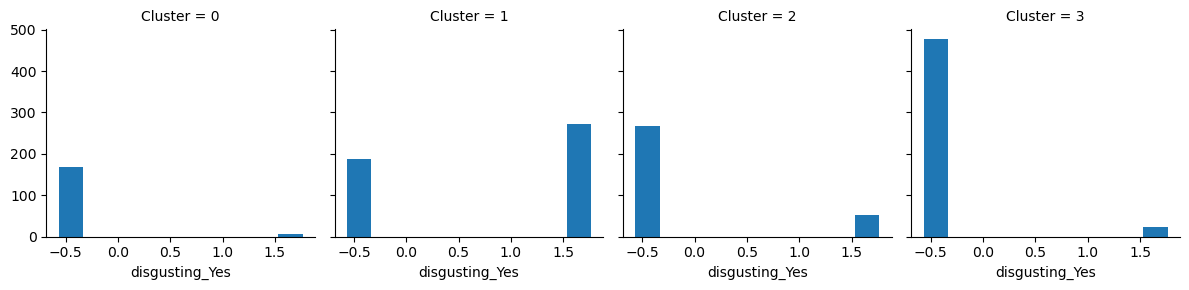

In [108]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col ='Cluster')
    grid= grid.map(plt.hist,c)
plt.show()


In [109]:
#saving the kmeans clustering model and the data with cluster label
import joblib
joblib.dump(kmeans_model,"kmeans model.pkl")

['kmeans model.pkl']

In [110]:
cluster_df.to_csv("Clustered_Segmentation_Data.csv")

In [111]:
#Training and Testing the model accuracy using decision tree
#split Dataset

X = cluster_df.drop(['Cluster'],axis=1)
y = cluster_df[['Cluster']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [112]:
X_train

,Age,yummy_No,yummy_Yes,convenient_No,convenient_Yes,fattening_No,fattening_Yes,greasy_No,greasy_Yes,fast_No,...,cheap_No,cheap_Yes,tasty_No,tasty_Yes,expensive_No,expensive_Yes,healthy_No,healthy_Yes,disgusting_No,disgusting_Yes
1279,-0.183237,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,1.221590,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488
1093,-1.449391,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-0.818605,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488
1088,0.801549,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-0.818605,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488
1411,0.731207,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-0.818605,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488
656,-1.730759,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-0.818605,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,0.942233,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,-0.818605,0.818605,1.345528,-1.345528,-1.339489,1.339489,0.498279,-0.498279,-1.765261,1.765261
369,-1.660417,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,-0.818605,0.818605,-0.743203,0.743203,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488
1135,-1.097682,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,-0.818605,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488
1029,-0.745972,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,1.221590,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488


In [113]:
X_test

,Age,yummy_No,yummy_Yes,convenient_No,convenient_Yes,fattening_No,fattening_Yes,greasy_No,greasy_Yes,fast_No,...,cheap_No,cheap_Yes,tasty_No,tasty_Yes,expensive_No,expensive_Yes,healthy_No,healthy_Yes,disgusting_No,disgusting_Yes
531,-0.464605,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,1.221590,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488
1184,0.309156,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,1.221590,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488
396,1.082916,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,-0.818605,0.818605,1.345528,-1.345528,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488
677,0.731207,1.111479,-1.111479,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,-0.332951,...,1.221590,-1.221590,-0.743203,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488
1317,0.871891,-0.899702,0.899702,-0.318735,0.318735,2.555092,-2.555092,1.054476,-1.054476,3.003446,...,-0.818605,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1.153258,1.111479,-1.111479,3.137401,-3.137401,-0.391375,0.391375,-0.948339,0.948339,3.003446,...,1.221590,-1.221590,1.345528,-1.345528,-1.339489,1.339489,0.498279,-0.498279,-1.765261,1.765261
981,1.786335,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,-0.332951,...,-0.818605,0.818605,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,-1.765261,1.765261
1053,-0.183237,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,1.054476,-1.054476,3.003446,...,1.221590,-1.221590,1.345528,-1.345528,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488
221,1.575309,-0.899702,0.899702,-0.318735,0.318735,-0.391375,0.391375,-0.948339,0.948339,3.003446,...,1.221590,-1.221590,-0.743203,0.743203,0.746553,-0.746553,0.498279,-0.498279,0.566488,-0.566488


In [114]:
# decision tree
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [115]:
#confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred))

[[ 56   0   1   0]
 [  0 138   1   0]
 [  0   0  95   0]
 [  0   0   0 145]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       1.00      0.99      1.00       139
           2       0.98      1.00      0.99        95
           3       1.00      1.00      1.00       145

    accuracy                           1.00       436
   macro avg       0.99      0.99      0.99       436
weighted avg       1.00      1.00      1.00       436



In [116]:
#saving the decision tree model for future prediction

import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename,'wb'))
# some time later...
# load the model from disk

loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test, y_test)
print(result, '% Accuracy')

0.9954128440366973 % Accuracy
